In [161]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

In [162]:
def rand(a):
  a_cumsum = np.cumsum(a)
  r = np.random.uniform(0, a_cumsum[-1])
  return np.searchsorted(a_cumsum, r)

In [163]:
def get_emp_matrix(a, b, p, n):
  r_sums = np.sum(p, axis = 1)
  emp_matrix = np.zeros(np.shape(p))
  a_list = []
  b_list = []
  for k in range(n):
    a_k_index = rand(r_sums)
    p_a_k = r_sums[a_k_index]

    p_ba_k = [(p[a_k_index][k] / p_a_k) for k in range(len(p[a_k_index]))]
    b_k_index = rand(p_ba_k)

    a_list.append(a[a_k_index])
    b_list.append(b[b_k_index])

    emp_matrix[a_k_index][b_k_index] +=  1 / n

  return emp_matrix, a_list, b_list

In [164]:
def plot_hist(a, b):
  fig, ax = plt.subplots()
  ax.bar(a, b)
  plt.show()

Точечная оценка метематического ожидания

$m= \frac{1}{n} \sum_{i=1}^n x$


In [165]:
def get_point_m(x):
  return np.sum(x) / len(x)

Точечная оценка дисперсии

$d= \frac{1}{n -1} \sum_{i=1}^n (x_{n} - \bar x)^2$

In [166]:
def get_point_d(x, m):
  return np.sum(list(map(lambda i: (i - m) ** 2, x))) / (len(x) - 1)

Интервальная оценка математического ожидания

$ I_{a} = (m - t_{n-1, a/2} \sqrt{D/n}; m + t_{n-1, a/2} \sqrt{D/n})$

In [193]:
def get_interval_m(m, d, n, a):
  t = np.sqrt(d/n) * sc.t.ppf((1 + a)/2, n-1)
  return m - t, m + t

Интервальная оценка дисперсии

$ I_{a} = (\frac{(n -1)D}{X_{n-1, a/2}^2}: \frac{(n-1)D}{X_{n-1, 1-a/2}^2})$

In [210]:
def get_interval_d(d, n, a):
  return (n - 1) * d / sc.chi2.ppf( (1 + a) / 2, n - 1), (n - 1) * d / sc.chi2.ppf(a / 2, n - 1)

Коэффициент корреляции

$r=\frac{\sum_{i=1}^n (x_{n} - \bar x)(y_{n} -  \bar y)}
{(n)\sigma_{x}\sigma_{y}}$

$n$ - размер выборки

$\bar x$ - математическое ожидание велечины $x$

$\bar y$ - математическое ожидание велечины $y$

$\sigma_{x}$ - стандартное отклонения велечины $x$

$\sigma_{y}$ - стандартное отклонения велечины $y$


In [169]:
def get_cor_coef(x, y, mx, my, dx, dy):
  return np.sum(list(map(lambda i, j: (i - mx) * (j - my), x, y))) / ((len(x)) * np.sqrt(dx * dy))

Критерий Хи-квадрат Пирсона

$X^2 = \sum_{i=1}^n \sum_{j=1}^m \frac{(Q_{ij} - E_{ij})^2}
{E_{ij}}$

$O$ - наблюдаемые вероятности
$E$ - ожидаемые вероятности

In [170]:
def chi2_test(th_matrix, emp_matrix, n, p = 0.05):
  chi2 = np.sum(((emp_matrix - th_matrix) ** 2) / th_matrix)
  r, c = np.shape(th_matrix) 
  f = (r - 1) * (c - 1)
  critical = sc.chi2.ppf(p, f)
  return critical >= chi2

Теоретическая матрица
[[0.01 0.04 0.02 0.03]
 [0.04 0.16 0.08 0.12]
 [0.2  0.08 0.04 0.06]
 [0.03 0.12 0.06 0.09]]
Эмпирическая матрица
[[0.008  0.0366 0.0177 0.0236]
 [0.0346 0.1303 0.0705 0.0987]
 [0.1695 0.0697 0.0334 0.051 ]
 [0.0251 0.103  0.052  0.0763]]


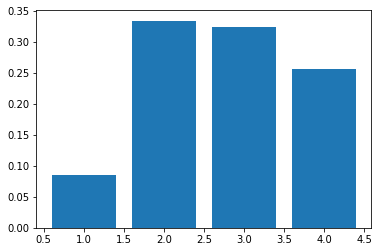

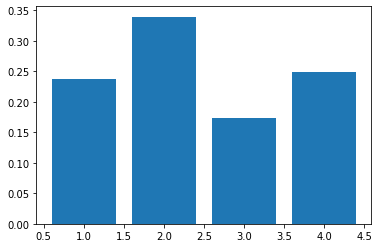

Точечные оценки
Математическое ожидани a: 2.7505
Математическое ожидани b: 2.4356
Дисперсия a: 0.8719369436943694
Дисперсия b: 1.2195745974597463

Интервальные оценки
Математическое ожидани a: (2.745642936072584, 2.7553570639274163) при вероятнояти 0.9
Математическое ожидани b: (2.429855721799319, 2.441344278200681) при вероятнояти 0.9
Дисперсия a: (0.8655600179717973, 0.8724329538550947) при вероятнояти 0.9
Дисперсия b: (1.2106552178218277, 1.220268364820422) при вероятнояти 0.9
Математическое ожидани a: (2.7453304203699576, 2.7556695796300428) при вероятнояти 0.92
Математическое ожидани b: (2.4294861205000986, 2.4417138794999014) при вероятнояти 0.92
Дисперсия a: (0.8651514790705094, 0.8723345129686845) при вероятнояти 0.92
Дисперсия b: (1.2100837961500106, 1.2201306759596788) при вероятнояти 0.92
Математическое ожидани a: (2.7449462208446858, 2.7560537791553146) при вероятнояти 0.94
Математическое ожидани b: (2.4290317412720897, 2.4421682587279103) при вероятнояти 0.94
Дисперсия a: 

In [212]:
a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 3, 4])

p = np.array([
     [0.01, 0.04, 0.02, 0.03],
     [0.04, 0.16, 0.08, 0.12],
     [0.2, 0.08, 0.04, 0.06],
     [0.03, 0.12, 0.06, 0.09],
])

n = 100000
emp_matrix, a_list, b_list = get_emp_matrix(a, b, p, 10000)

print('Теоретическая матрица')
print(p)
print('Эмпирическая матрица')
print(emp_matrix)

plot_hist(a, np.sum(emp_matrix, axis = 1))
plot_hist(b, np.sum(emp_matrix, axis = 0))

a_pm = get_point_m(a_list)
b_pm = get_point_m(b_list)
a_pd = get_point_d(a_list, a_pm)
b_pd = get_point_d(b_list, b_pm)

print('Точечные оценки')
print('Математическое ожидани a:', a_pm)
print('Математическое ожидани b:', b_pm)
print('Дисперсия a:', a_pd)
print('Дисперсия b:', b_pd)
print()

print('Интервальные оценки')
for i in [0.90, 0.92, 0.94, 0.96, 0.98]:
  a_im = get_interval_m(a_pm, a_pd, n, i)
  b_im = get_interval_m(b_pm, b_pd, n, i)
  a_id = get_interval_d(a_pd, n, i)
  b_id = get_interval_d(b_pd, n, i)
  print('Математическое ожидани a:', a_im, 'при вероятнояти', i)
  print('Математическое ожидани b:', b_im, 'при вероятнояти', i)
  print('Дисперсия a:', a_id, 'при вероятнояти', i)
  print('Дисперсия b:', b_id, 'при вероятнояти', i)
print()

cor_coef  = get_cor_coef(a_list, b_list, a_pm, b_pm, a_pd, b_pd)

print('Коэффициент корреляции:', cor_coef)
print('Критерий Пирсона:', chi2_test(p, emp_matrix, n))